# Medical Insurance Cost Prediction Analysis

This notebook analyzes a medical insurance dataset containing 100,000 rows with 54+ features across multiple categories:
- Demographics & Socioeconomic
- Lifestyle & Habits
- Health & Clinical
- Healthcare Utilization & Procedures
- Insurance & Policy
- Medical Costs & Claims

## 1. Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

## 2. Load the Dataset

In [3]:
# Load the medical insurance dataset
df = pd.read_csv('medical_insurance.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 100,000 rows × 54 columns


## 3. Initial Data Exploration

In [4]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,73.00,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,NaN,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,7661.01,1538.02,128.17,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,NaN,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,68.39,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1700.73,500.93,41.74,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0


In [5]:
# Display dataset info
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 no

In [6]:
# Display statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,117.808970,73.604770,119.975065,5.605968,1226.725000,19.520400,5.517760,0.050690,3.598920,0.519849,3009.451907,582.320040,48.526668,1.62178,656.512084,1377.878827,0.724720,0.203450,0.085930,0.058870,0.035950,0.051170,0.021510,0.014620,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,15.369187,8.900924,30.262086,0.845996,1019.619375,10.286255,2.868827,0.224591,0.594052,0.250669,3127.462822,399.583722,33.298640,2.02982,1072.660048,2305.464687,0.805523,0.402566,0.280262,0.235382,0.186166,0.220345,0.145078,0.120027,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,61.000000,40.000000,30.000000,3.540000,500.000000,10.000000,1.000000,0.000000,1.500000,0.000000,55.550000,211.670000,17.640000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,107.000000,67.000000,99.400000,5.160000,500.000000,10.000000,3.000000,0.000000,3.200000,0.329700,1175.117500,352.070000,29.340000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,117.000000,73.000000,120.000000,5.440000,1000.000000,20.000000,6.000000,0.000000,3.600000,0.505500,2082.575000,463.585000,38.630000,1.00000,318.015000,642.545000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,128.000000,79.000000,140.300000,5.760000,2000.000000,30.000000,8.000000,0.000000,4.010000,0.703300,3707.957500,666.697500,55.560000,2.00000,872.215000,1795.522500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,183.000000,114.000000,248.300000,11.940000,5000.000000,50.000000,10.000000,2.000000,5.000000,1.000000,65724.9000

In [7]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
})
missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

Missing Values:


,Missing_Count,Percentage
alcohol_freq,30083,30.083


In [8]:
# Fill missing values in alcohol_freq with 'None' to indicate no alcohol consumption
df['alcohol_freq'] = df['alcohol_freq'].fillna('None')

print(f"Missing values in 'alcohol_freq' after fix: {df['alcohol_freq'].isnull().sum()}")
print(f"\nValue counts for 'alcohol_freq':")
print(df['alcohol_freq'].value_counts())

Missing values in 'alcohol_freq' after fix: 0

Value counts for 'alcohol_freq':
alcohol_freq
Occasional    45078
None          30083
Weekly        19833
Daily          5006
Name: count, dtype: int64


---

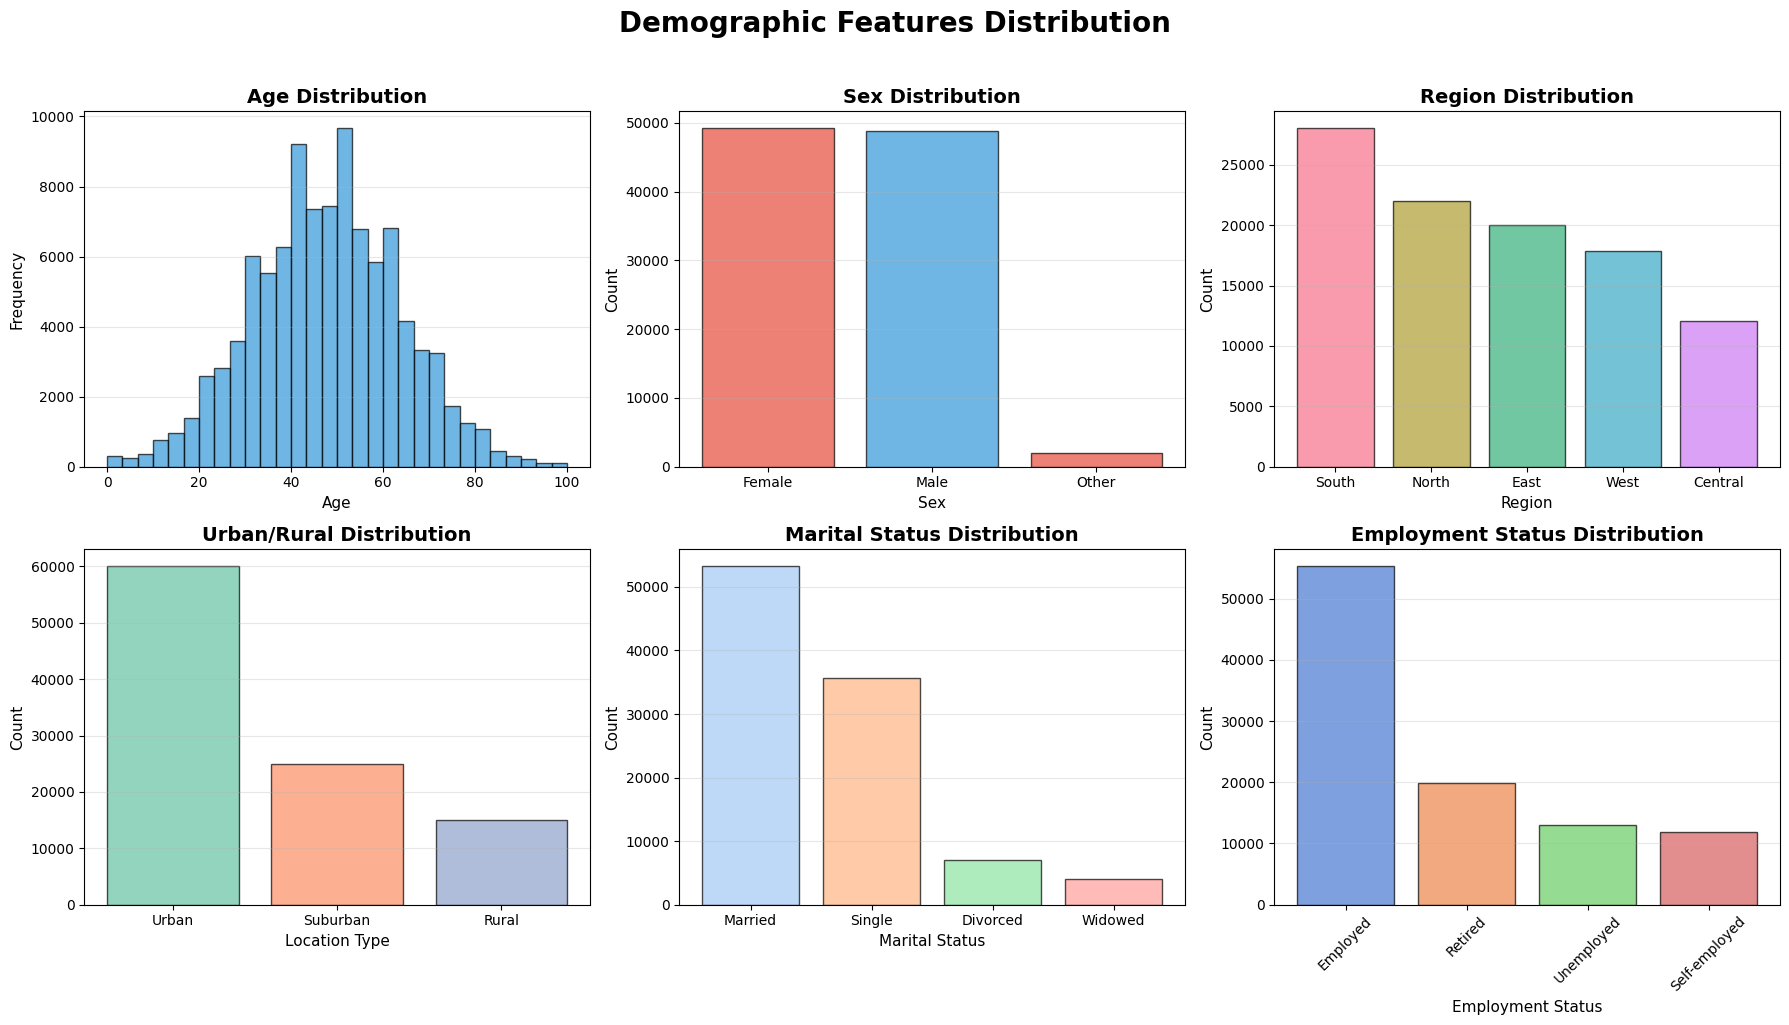

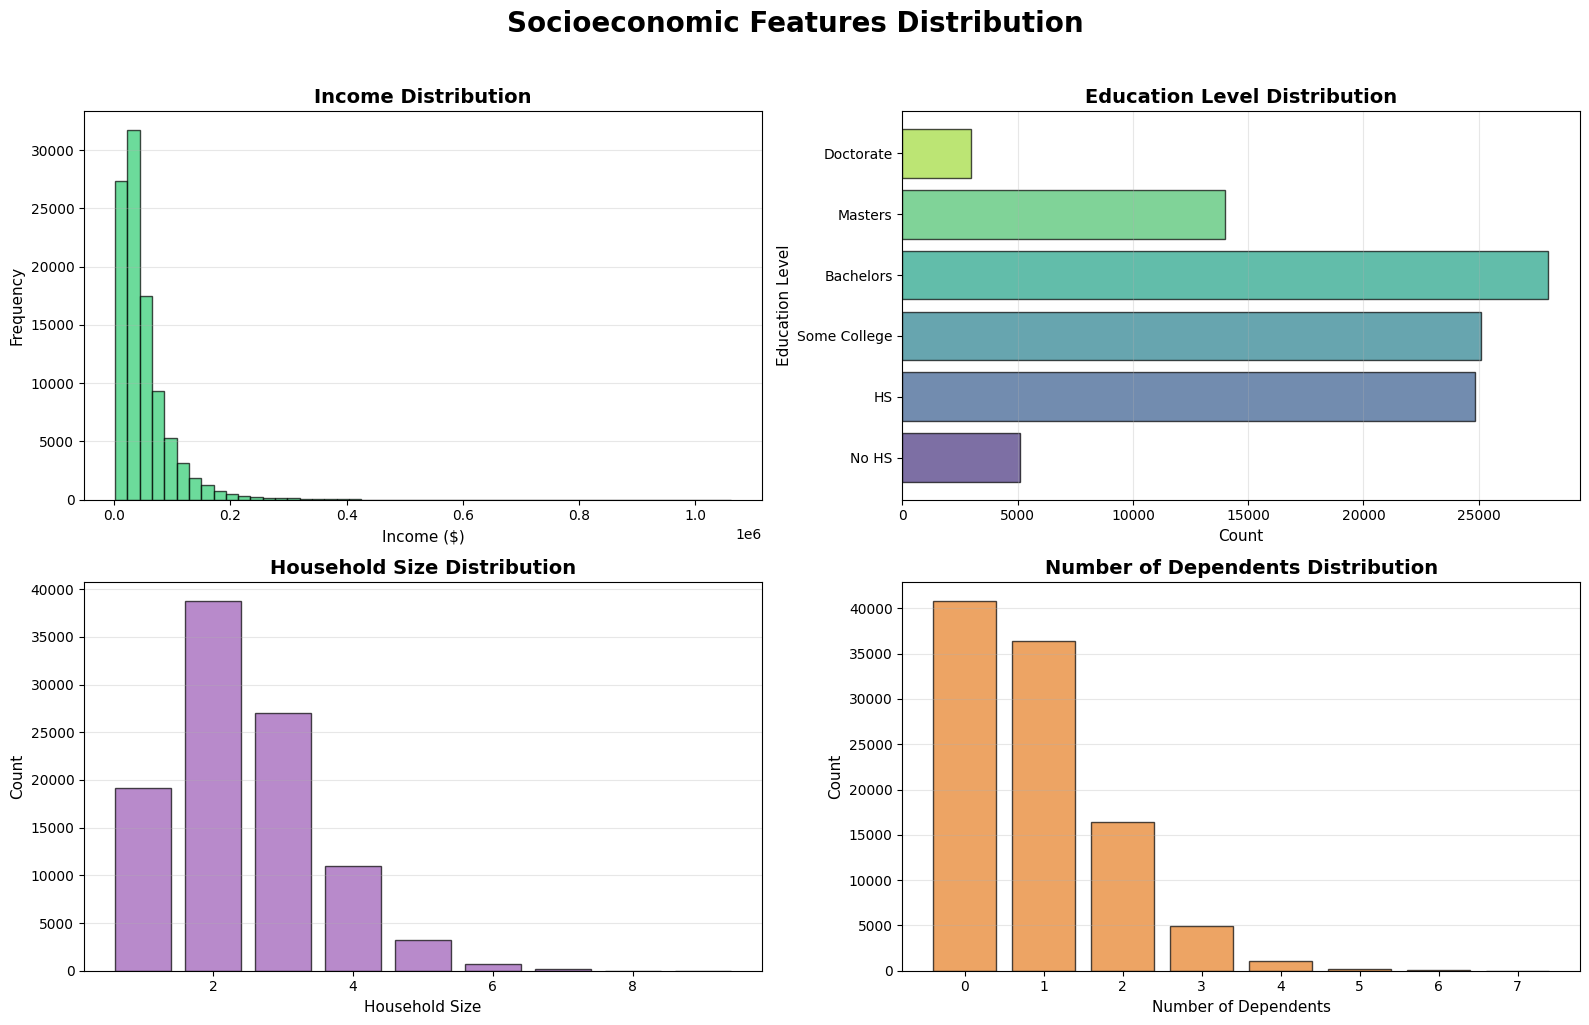

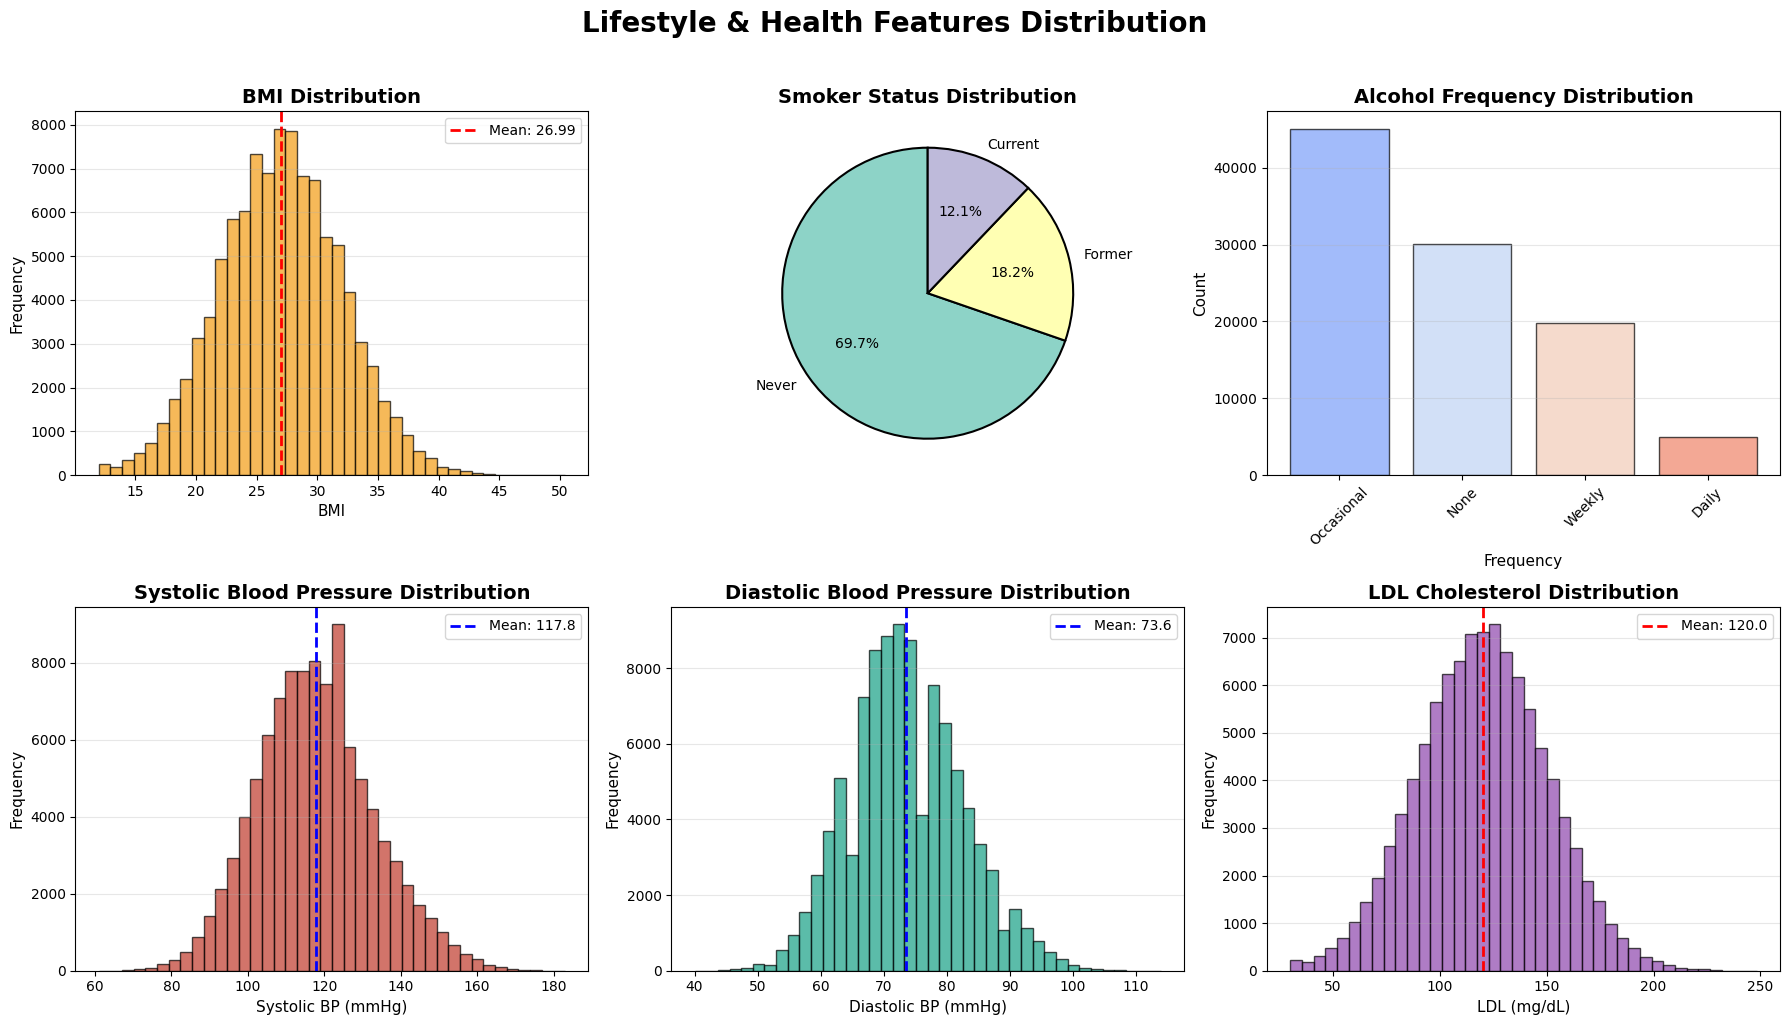

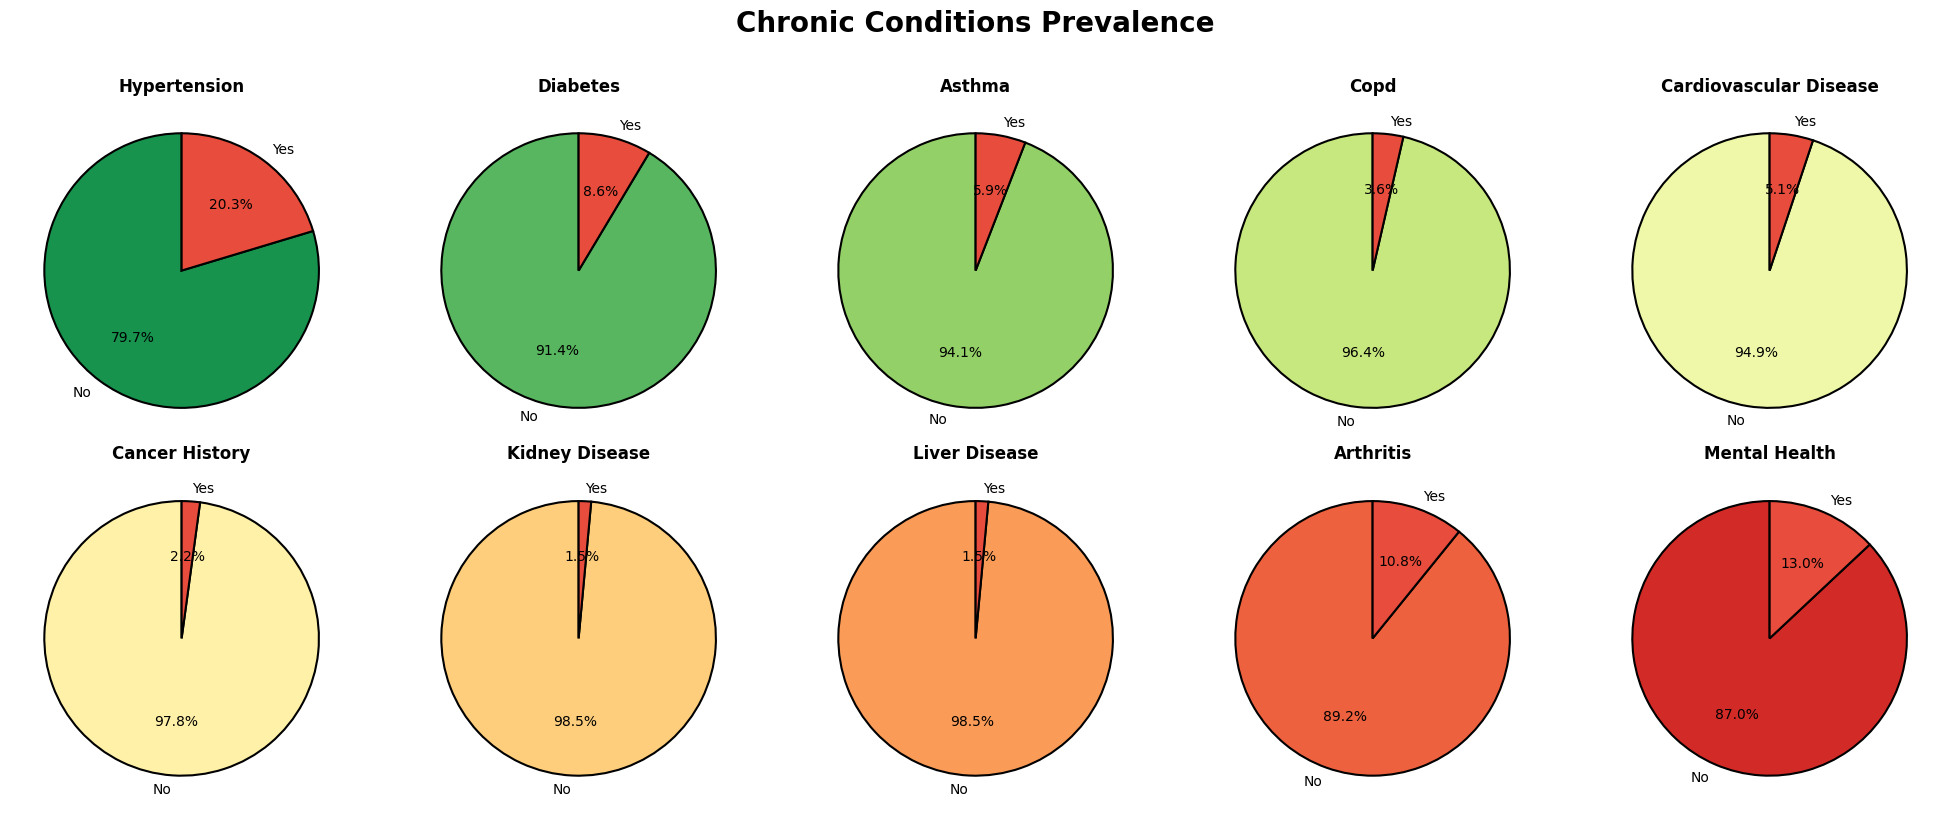

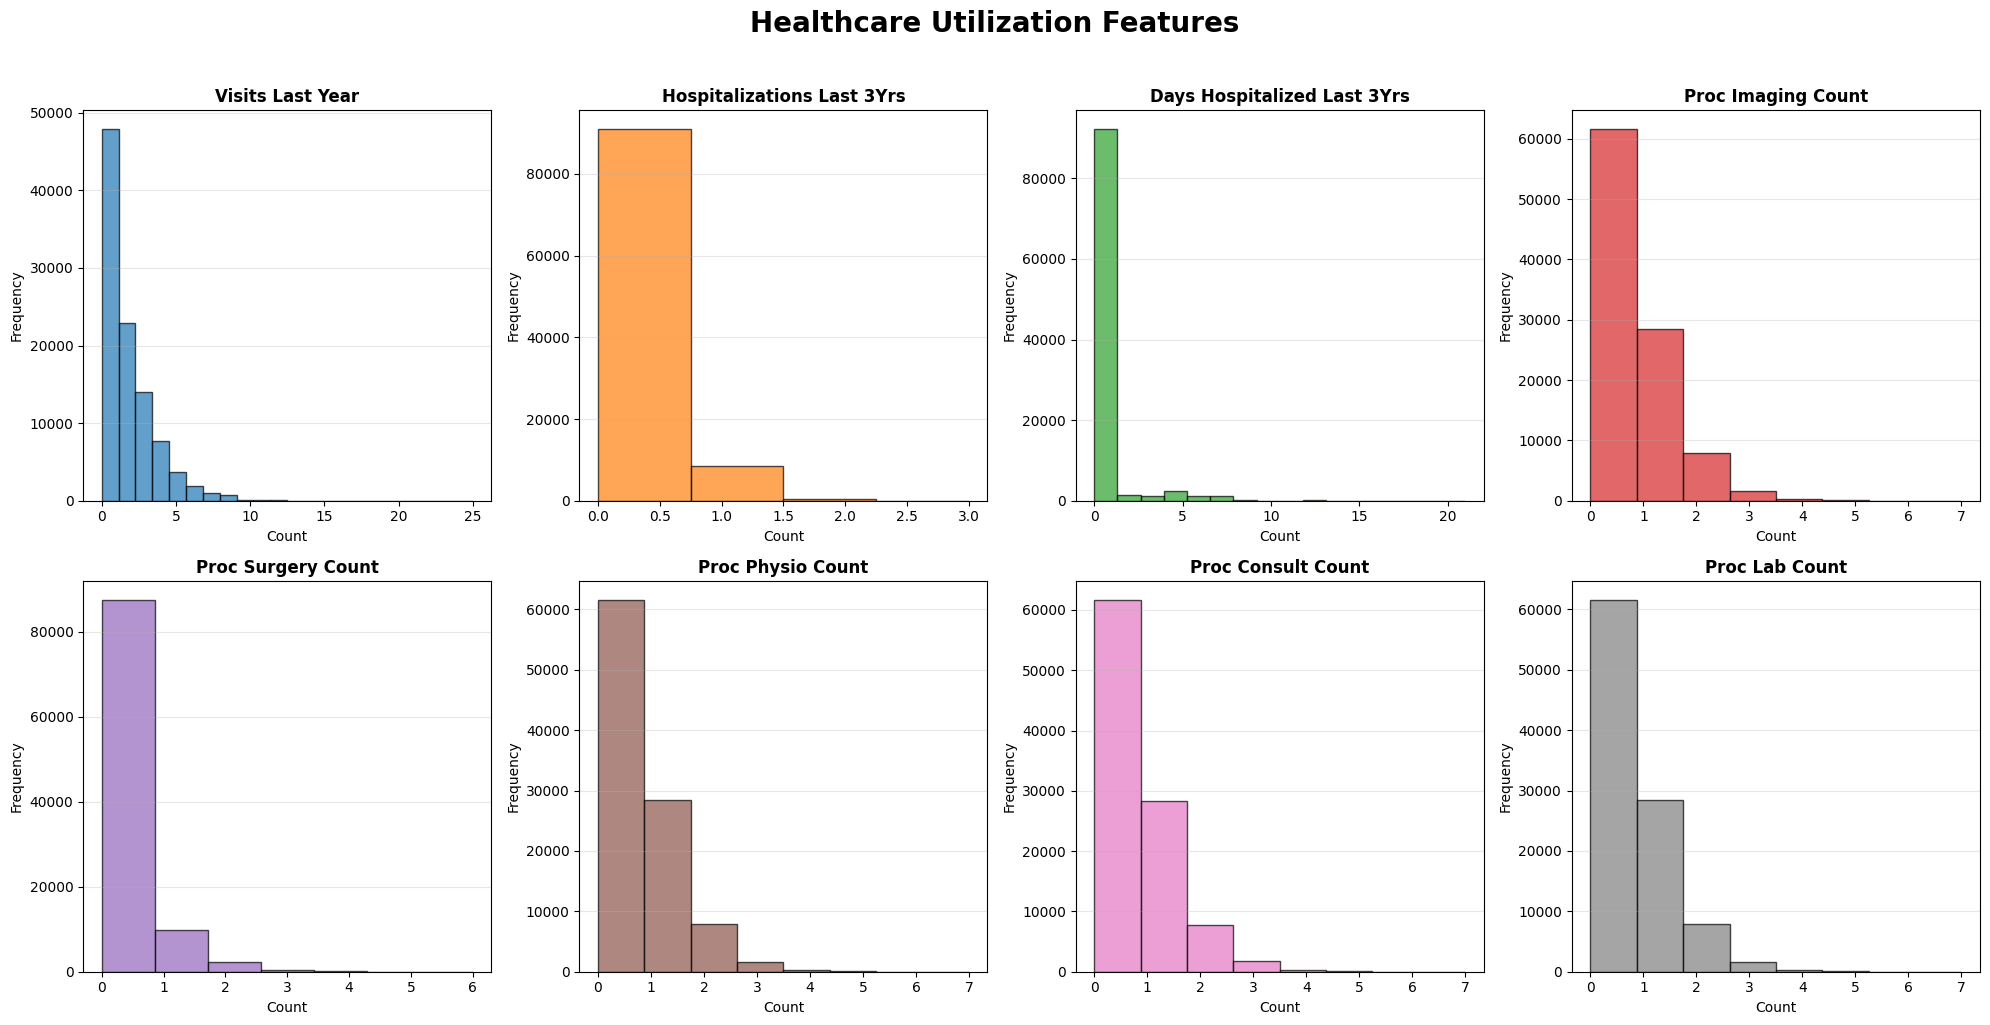

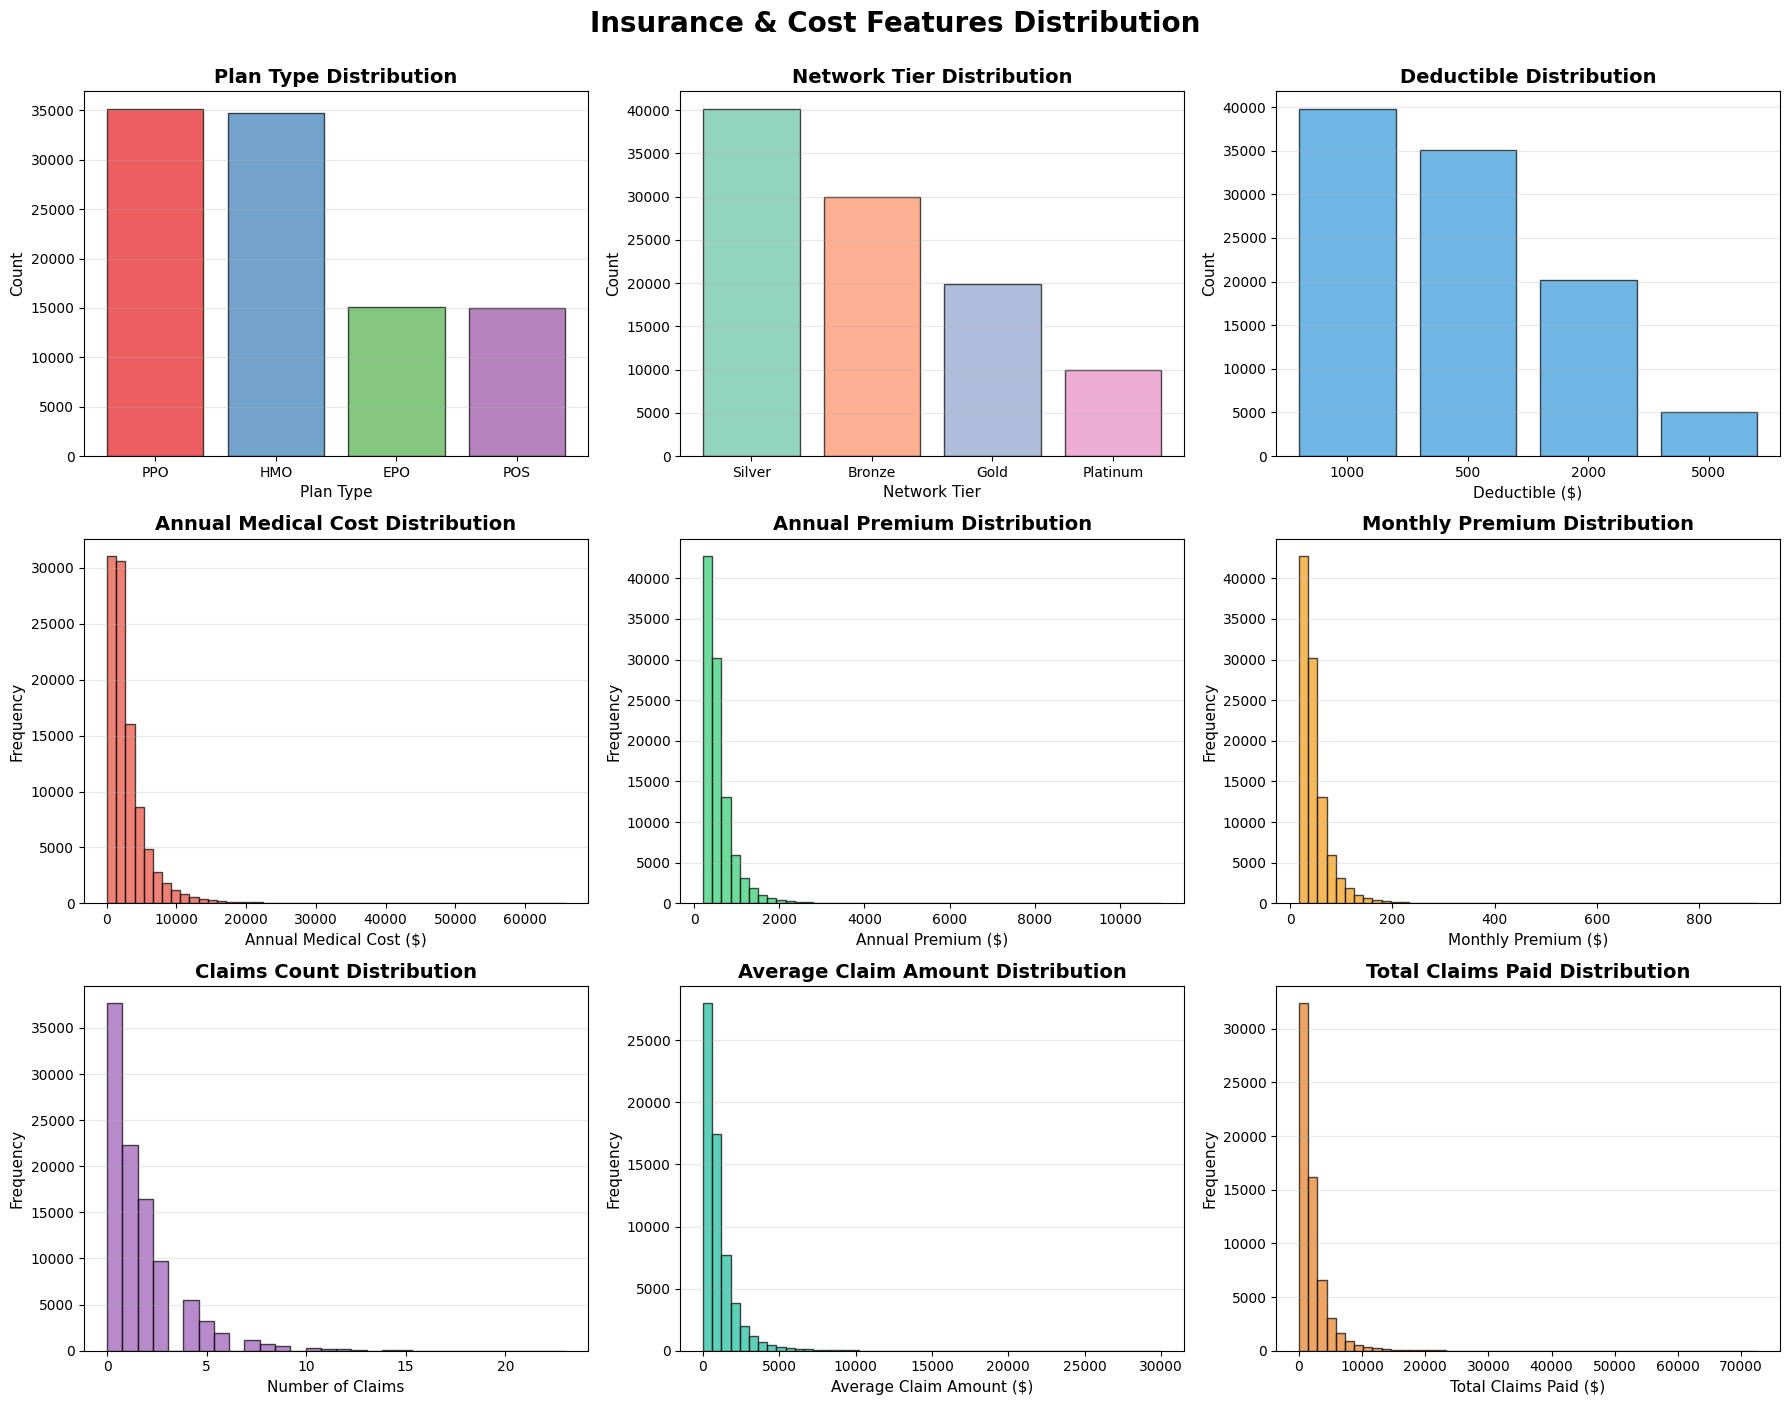

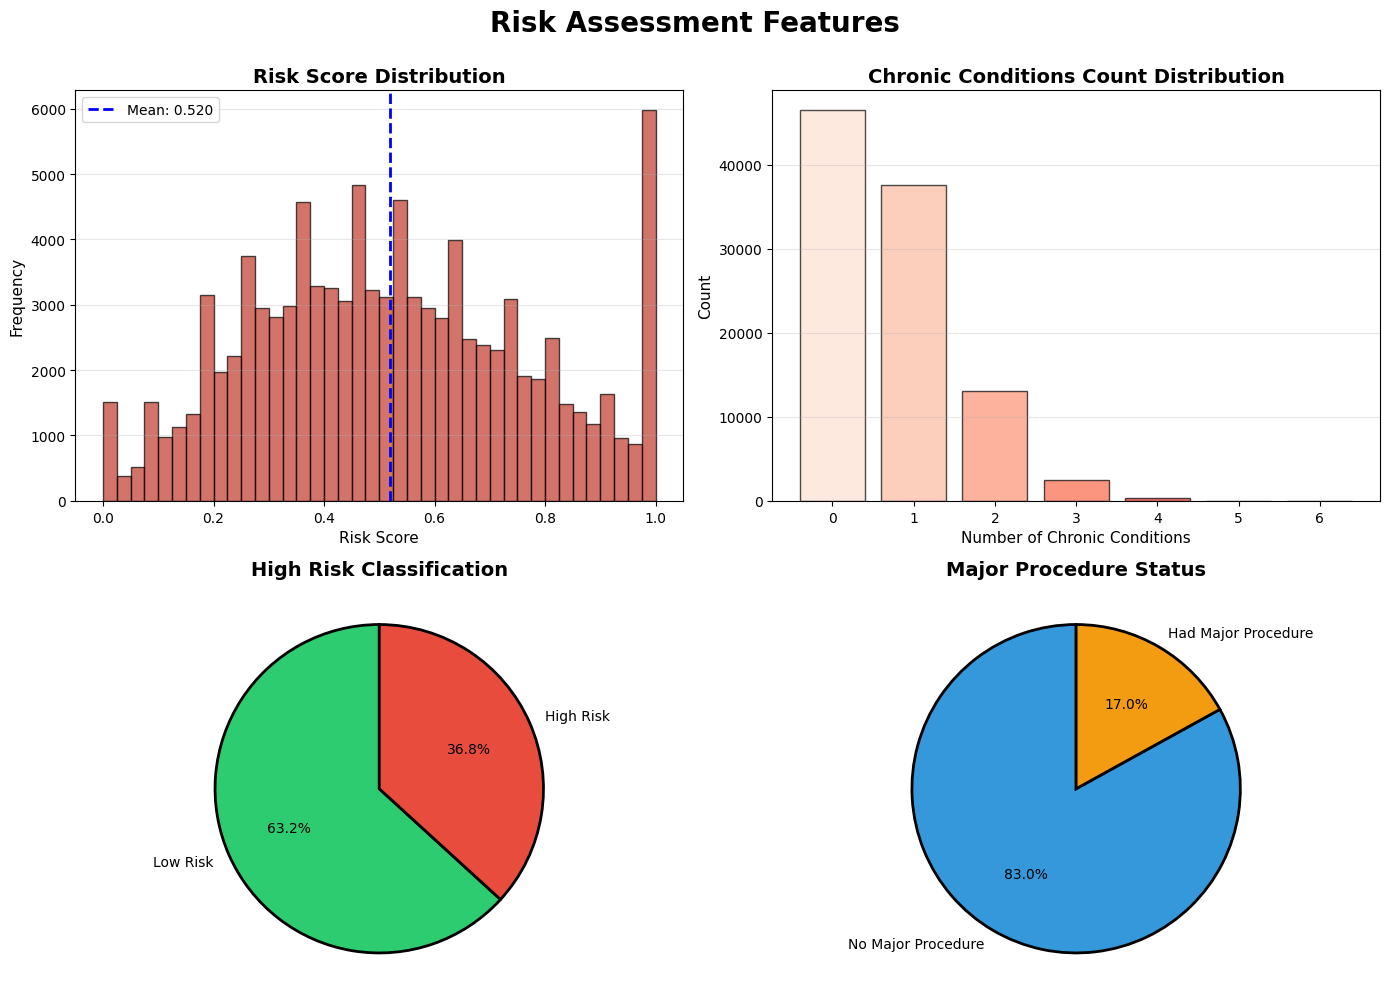

✓ All data visualizations completed successfully!


In [9]:
# Create comprehensive data visualizations for all features

# Define feature categories
demographic_features = ['age', 'sex', 'region', 'urban_rural', 'marital_status', 'employment_status']
socioeconomic_features = ['income', 'education', 'household_size', 'dependents']
lifestyle_features = ['bmi', 'smoker', 'alcohol_freq']
health_features = ['systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'medication_count']
chronic_conditions = ['hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 
                      'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health']
healthcare_util = ['visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
                   'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 
                   'proc_consult_count', 'proc_lab_count']
insurance_features = ['plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years', 
                      'policy_changes_last_2yrs', 'provider_quality']
cost_features = ['annual_medical_cost', 'annual_premium', 'monthly_premium', 
                 'claims_count', 'avg_claim_amount', 'total_claims_paid']
risk_features = ['risk_score', 'chronic_count', 'is_high_risk', 'had_major_procedure']

# 1. DEMOGRAPHIC FEATURES
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Demographic Features Distribution', fontsize=20, fontweight='bold', y=1.02)

# Age distribution
axes[0, 0].hist(df['age'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].grid(axis='y', alpha=0.3)

# Sex distribution
sex_counts = df['sex'].value_counts()
axes[0, 1].bar(sex_counts.index, sex_counts.values, color=['#e74c3c', '#3498db'], edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Sex Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Sex', fontsize=11)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].grid(axis='y', alpha=0.3)

# Region distribution
region_counts = df['region'].value_counts()
axes[0, 2].bar(region_counts.index, region_counts.values, color=sns.color_palette('husl', len(region_counts)), edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Region Distribution', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Region', fontsize=11)
axes[0, 2].set_ylabel('Count', fontsize=11)
axes[0, 2].grid(axis='y', alpha=0.3)

# Urban/Rural distribution
urban_counts = df['urban_rural'].value_counts()
axes[1, 0].bar(urban_counts.index, urban_counts.values, color=sns.color_palette('Set2', len(urban_counts)), edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Urban/Rural Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Location Type', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].grid(axis='y', alpha=0.3)

# Marital Status
marital_counts = df['marital_status'].value_counts()
axes[1, 1].bar(marital_counts.index, marital_counts.values, color=sns.color_palette('pastel', len(marital_counts)), edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Marital Status Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Marital Status', fontsize=11)
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].grid(axis='y', alpha=0.3)

# Employment Status
employment_counts = df['employment_status'].value_counts()
axes[1, 2].bar(employment_counts.index, employment_counts.values, color=sns.color_palette('muted', len(employment_counts)), edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Employment Status Distribution', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Employment Status', fontsize=11)
axes[1, 2].set_ylabel('Count', fontsize=11)
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 2. SOCIOECONOMIC FEATURES
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Socioeconomic Features Distribution', fontsize=20, fontweight='bold', y=1.02)

# Income distribution
axes[0, 0].hist(df['income'], bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Income Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Income ($)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].grid(axis='y', alpha=0.3)

# Education distribution
education_counts = df['education'].value_counts()
education_order = ['No HS', 'HS', 'Some College', 'Bachelors', 'Masters', 'Doctorate']
education_counts = education_counts.reindex(education_order)
axes[0, 1].barh(education_counts.index, education_counts.values, color=sns.color_palette('viridis', len(education_counts)), edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Education Level Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Count', fontsize=11)
axes[0, 1].set_ylabel('Education Level', fontsize=11)
axes[0, 1].grid(axis='x', alpha=0.3)

# Household Size
household_counts = df['household_size'].value_counts().sort_index()
axes[1, 0].bar(household_counts.index, household_counts.values, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Household Size Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Household Size', fontsize=11)
axes[1, 0].set_ylabel('Count', fontsize=11)
axes[1, 0].grid(axis='y', alpha=0.3)

# Dependents
dependents_counts = df['dependents'].value_counts().sort_index()
axes[1, 1].bar(dependents_counts.index, dependents_counts.values, color='#e67e22', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Number of Dependents Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Dependents', fontsize=11)
axes[1, 1].set_ylabel('Count', fontsize=11)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 3. LIFESTYLE & HEALTH FEATURES
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Lifestyle & Health Features Distribution', fontsize=20, fontweight='bold', y=1.02)

# BMI distribution
axes[0, 0].hist(df['bmi'], bins=40, color='#f39c12', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['bmi'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["bmi"].mean():.2f}')
axes[0, 0].set_title('BMI Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('BMI', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Smoker status
smoker_counts = df['smoker'].value_counts()
axes[0, 1].pie(smoker_counts.values, labels=smoker_counts.index, autopct='%1.1f%%', 
               colors=sns.color_palette('Set3', len(smoker_counts)), startangle=90, 
               wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
axes[0, 1].set_title('Smoker Status Distribution', fontsize=14, fontweight='bold')

# Alcohol frequency
alcohol_counts = df['alcohol_freq'].value_counts()
axes[0, 2].bar(alcohol_counts.index, alcohol_counts.values, color=sns.color_palette('coolwarm', len(alcohol_counts)), edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Alcohol Frequency Distribution', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Frequency', fontsize=11)
axes[0, 2].set_ylabel('Count', fontsize=11)
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(axis='y', alpha=0.3)

# Systolic BP
axes[1, 0].hist(df['systolic_bp'], bins=40, color='#c0392b', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df['systolic_bp'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["systolic_bp"].mean():.1f}')
axes[1, 0].set_title('Systolic Blood Pressure Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Systolic BP (mmHg)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Diastolic BP
axes[1, 1].hist(df['diastolic_bp'], bins=40, color='#16a085', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df['diastolic_bp'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["diastolic_bp"].mean():.1f}')
axes[1, 1].set_title('Diastolic Blood Pressure Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Diastolic BP (mmHg)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

# LDL Cholesterol
axes[1, 2].hist(df['ldl'], bins=40, color='#8e44ad', edgecolor='black', alpha=0.7)
axes[1, 2].axvline(df['ldl'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["ldl"].mean():.1f}')
axes[1, 2].set_title('LDL Cholesterol Distribution', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('LDL (mg/dL)', fontsize=11)
axes[1, 2].set_ylabel('Frequency', fontsize=11)
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 4. CHRONIC CONDITIONS
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle('Chronic Conditions Prevalence', fontsize=20, fontweight='bold', y=1.02)

colors_chronic = sns.color_palette('RdYlGn_r', 10)

for idx, condition in enumerate(chronic_conditions):
    row = idx // 5
    col = idx % 5
    
    condition_counts = df[condition].value_counts()
    labels = ['No', 'Yes']
    values = [condition_counts.get(0, 0), condition_counts.get(1, 0)]
    
    axes[row, col].pie(values, labels=labels, autopct='%1.1f%%', 
                       colors=[colors_chronic[idx], '#e74c3c'], startangle=90,
                       wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})
    axes[row, col].set_title(condition.replace('_', ' ').title(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. HEALTHCARE UTILIZATION
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Healthcare Utilization Features', fontsize=20, fontweight='bold', y=1.02)

utilization_features = ['visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
                        'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 
                        'proc_consult_count', 'proc_lab_count']

colors_util = sns.color_palette('tab10', 8)

for idx, feature in enumerate(utilization_features):
    row = idx // 4
    col = idx % 4
    
    axes[row, col].hist(df[feature], bins=min(30, df[feature].nunique()), 
                        color=colors_util[idx], edgecolor='black', alpha=0.7)
    axes[row, col].set_title(feature.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Count', fontsize=10)
    axes[row, col].set_ylabel('Frequency', fontsize=10)
    axes[row, col].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 6. INSURANCE & COST FEATURES
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Insurance & Cost Features Distribution', fontsize=20, fontweight='bold', y=1.0)

# Plan Type
plan_counts = df['plan_type'].value_counts()
axes[0, 0].bar(plan_counts.index, plan_counts.values, color=sns.color_palette('Set1', len(plan_counts)), edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Plan Type Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Plan Type', fontsize=11)
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].grid(axis='y', alpha=0.3)

# Network Tier
network_counts = df['network_tier'].value_counts()
axes[0, 1].bar(network_counts.index, network_counts.values, color=sns.color_palette('Set2', len(network_counts)), edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Network Tier Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Network Tier', fontsize=11)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].grid(axis='y', alpha=0.3)

# Deductible
deductible_counts = df['deductible'].value_counts()
axes[0, 2].bar(deductible_counts.index.astype(str), deductible_counts.values, color='#3498db', edgecolor='black', alpha=0.7)
axes[0, 2].set_title('Deductible Distribution', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Deductible ($)', fontsize=11)
axes[0, 2].set_ylabel('Count', fontsize=11)
axes[0, 2].grid(axis='y', alpha=0.3)

# Annual Medical Cost
axes[1, 0].hist(df['annual_medical_cost'], bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Annual Medical Cost Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Annual Medical Cost ($)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].grid(axis='y', alpha=0.3)

# Annual Premium
axes[1, 1].hist(df['annual_premium'], bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Annual Premium Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Annual Premium ($)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].grid(axis='y', alpha=0.3)

# Monthly Premium
axes[1, 2].hist(df['monthly_premium'], bins=50, color='#f39c12', edgecolor='black', alpha=0.7)
axes[1, 2].set_title('Monthly Premium Distribution', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Monthly Premium ($)', fontsize=11)
axes[1, 2].set_ylabel('Frequency', fontsize=11)
axes[1, 2].grid(axis='y', alpha=0.3)

# Claims Count
axes[2, 0].hist(df['claims_count'], bins=30, color='#9b59b6', edgecolor='black', alpha=0.7)
axes[2, 0].set_title('Claims Count Distribution', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Number of Claims', fontsize=11)
axes[2, 0].set_ylabel('Frequency', fontsize=11)
axes[2, 0].grid(axis='y', alpha=0.3)

# Average Claim Amount
axes[2, 1].hist(df[df['avg_claim_amount'] > 0]['avg_claim_amount'], bins=50, color='#1abc9c', edgecolor='black', alpha=0.7)
axes[2, 1].set_title('Average Claim Amount Distribution', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Average Claim Amount ($)', fontsize=11)
axes[2, 1].set_ylabel('Frequency', fontsize=11)
axes[2, 1].grid(axis='y', alpha=0.3)

# Total Claims Paid
axes[2, 2].hist(df[df['total_claims_paid'] > 0]['total_claims_paid'], bins=50, color='#e67e22', edgecolor='black', alpha=0.7)
axes[2, 2].set_title('Total Claims Paid Distribution', fontsize=14, fontweight='bold')
axes[2, 2].set_xlabel('Total Claims Paid ($)', fontsize=11)
axes[2, 2].set_ylabel('Frequency', fontsize=11)
axes[2, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 7. RISK FEATURES
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Risk Assessment Features', fontsize=20, fontweight='bold', y=1.0)

# Risk Score
axes[0, 0].hist(df['risk_score'], bins=40, color='#c0392b', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['risk_score'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["risk_score"].mean():.3f}')
axes[0, 0].set_title('Risk Score Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Risk Score', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Chronic Count
chronic_count = df['chronic_count'].value_counts().sort_index()
axes[0, 1].bar(chronic_count.index, chronic_count.values, color=sns.color_palette('Reds', len(chronic_count)), edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Chronic Conditions Count Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Chronic Conditions', fontsize=11)
axes[0, 1].set_ylabel('Count', fontsize=11)
axes[0, 1].grid(axis='y', alpha=0.3)

# Is High Risk
high_risk_counts = df['is_high_risk'].value_counts()
axes[1, 0].pie([high_risk_counts.get(0, 0), high_risk_counts.get(1, 0)], 
               labels=['Low Risk', 'High Risk'], autopct='%1.1f%%',
               colors=['#2ecc71', '#e74c3c'], startangle=90,
               wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axes[1, 0].set_title('High Risk Classification', fontsize=14, fontweight='bold')

# Had Major Procedure
major_proc_counts = df['had_major_procedure'].value_counts()
axes[1, 1].pie([major_proc_counts.get(0, 0), major_proc_counts.get(1, 0)], 
               labels=['No Major Procedure', 'Had Major Procedure'], autopct='%1.1f%%',
               colors=['#3498db', '#f39c12'], startangle=90,
               wedgeprops={'edgecolor': 'black', 'linewidth': 2})
axes[1, 1].set_title('Major Procedure Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ All data visualizations completed successfully!")

## 4. Research Questions & Machine Learning Tasks

Based on the comprehensive medical insurance dataset, several research questions can be formulated to derive meaningful insights and build predictive models:

### 4.1 Cost Prediction Tasks

**Research Question 1: Can we predict annual medical costs based on patient demographics, lifestyle, and health conditions?**
- **Features**: `age`, `sex`, `region`, `bmi`, `smoker`, `alcohol_freq`, `chronic_count`, `hypertension`, `diabetes`, `asthma`, `copd`, `cardiovascular_disease`, `systolic_bp`, `diastolic_bp`, `ldl`, `hba1c`, `medication_count`
- **Target**: `annual_medical_cost`
- **Task Type**: Regression
- **Business Value**: Help insurance companies set appropriate premiums and identify cost drivers

**Research Question 2: What factors influence insurance premium pricing?**
- **Features**: `age`, `sex`, `region`, `urban_rural`, `bmi`, `smoker`, `chronic_count`, `risk_score`, `plan_type`, `network_tier`, `deductible`, `policy_term_years`
- **Target**: `annual_premium` or `monthly_premium`
- **Task Type**: Regression
- **Business Value**: Optimize premium pricing strategies and ensure competitiveness

### 4.2 Risk Assessment Tasks

**Research Question 3: Can we accurately identify high-risk patients who will require extensive medical care?**
- **Features**: `age`, `sex`, `bmi`, `smoker`, `alcohol_freq`, `systolic_bp`, `diastolic_bp`, `ldl`, `hba1c`, `chronic_count`, `hypertension`, `diabetes`, `cardiovascular_disease`, `cancer_history`, `kidney_disease`, `medication_count`, `visits_last_year`, `hospitalizations_last_3yrs`
- **Target**: `is_high_risk`
- **Task Type**: Binary Classification
- **Business Value**: Enable proactive health interventions and better resource allocation

**Research Question 4: What predicts a patient's risk score?**
- **Features**: All demographic, lifestyle, health, and chronic condition features
- **Target**: `risk_score`
- **Task Type**: Regression
- **Business Value**: Develop comprehensive risk assessment models

### 4.3 Healthcare Utilization Tasks

**Research Question 5: Can we predict the number of hospital visits a patient will make next year?**
- **Features**: `age`, `sex`, `income`, `education`, `bmi`, `smoker`, `chronic_count`, `hypertension`, `diabetes`, `asthma`, `copd`, `cardiovascular_disease`, `medication_count`, `systolic_bp`, `diastolic_bp`, `plan_type`, `network_tier`
- **Target**: `visits_last_year`
- **Task Type**: Regression or Classification (binned into categories)
- **Business Value**: Optimize healthcare facility staffing and resource management

**Research Question 6: Which patients are likely to require hospitalization?**
- **Features**: `age`, `sex`, `bmi`, `smoker`, `chronic_count`, `cardiovascular_disease`, `diabetes`, `hypertension`, `kidney_disease`, `systolic_bp`, `diastolic_bp`, `medication_count`, `risk_score`
- **Target**: Binary variable derived from `hospitalizations_last_3yrs` (0 if zero, 1 if > 0)
- **Task Type**: Binary Classification
- **Business Value**: Identify patients needing preventive care programs

### 4.4 Chronic Disease Prediction

**Research Question 7: Can we predict the development of specific chronic conditions (e.g., diabetes, hypertension)?**
- **Features**: `age`, `sex`, `bmi`, `smoker`, `alcohol_freq`, `income`, `education`, `exercise_frequency` (if available), `systolic_bp`, `diastolic_bp`, `ldl`, `hba1c`, `family_history` (if available)
- **Target**: Individual chronic conditions (`diabetes`, `hypertension`, `cardiovascular_disease`, etc.)
- **Task Type**: Binary Classification (for each condition)
- **Business Value**: Enable early intervention and preventive healthcare programs

**Research Question 8: What determines the total number of chronic conditions a patient will develop?**
- **Features**: `age`, `sex`, `bmi`, `smoker`, `alcohol_freq`, `systolic_bp`, `diastolic_bp`, `ldl`, `hba1c`, `income`, `education`, `employment_status`
- **Target**: `chronic_count`
- **Task Type**: Multi-class Classification or Regression
- **Business Value**: Identify vulnerable populations for targeted health programs

### 4.5 Claims and Procedures Prediction

**Research Question 9: Can we predict the number of insurance claims a patient will file?**
- **Features**: `age`, `sex`, `chronic_count`, `risk_score`, `visits_last_year`, `hospitalizations_last_3yrs`, `medication_count`, `plan_type`, `network_tier`, all chronic condition flags
- **Target**: `claims_count`
- **Task Type**: Regression or Classification
- **Business Value**: Improve claims processing efficiency and fraud detection

**Research Question 10: Which patients are likely to undergo major medical procedures?**
- **Features**: `age`, `sex`, `chronic_count`, `cardiovascular_disease`, `cancer_history`, `kidney_disease`, `risk_score`, `visits_last_year`, `hospitalizations_last_3yrs`, `plan_type`
- **Target**: `had_major_procedure`
- **Task Type**: Binary Classification
- **Business Value**: Optimize surgical facility planning and specialist allocation

### 4.6 Socioeconomic Impact Studies

**Research Question 11: How do socioeconomic factors influence healthcare outcomes and costs?**
- **Features**: `income`, `education`, `employment_status`, `urban_rural`, `region`, `marital_status`, `household_size`, `dependents`
- **Target**: `annual_medical_cost`, `chronic_count`, or `risk_score`
- **Task Type**: Regression or Classification
- **Business Value**: Identify healthcare disparities and inform policy decisions

**Research Question 12: Does insurance plan type affect healthcare utilization patterns?**
- **Features**: `plan_type`, `network_tier`, `deductible`, `copay`, `income`, `chronic_count`, `age`, `sex`
- **Target**: `visits_last_year`, `hospitalizations_last_3yrs`, or `total_claims_paid`
- **Task Type**: Regression or Multi-class Classification
- **Business Value**: Optimize insurance plan offerings and customer satisfaction

---